a0 =  [5.87058824]
a1 =  [-2.49019608]
a2 =  [1.81372549]
St = [ 37.61875 ]
Sr =  [1.60588235]
r =  [97.84230426] %


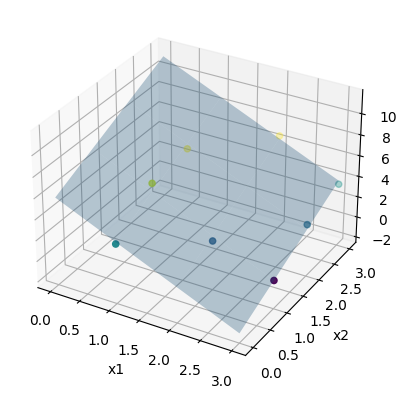

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from mpl_toolkits import mplot3d
x1 = [1,1,2,3,1,2,3,3]
x2 = [0,1,1,2,2,3,3,1]
y = [3.2,6,2.2,2.5,6.5,6.6,3.5,0.2]
x12 = [1,1,2,3,1,2,3,3]
for i in range(0,len(x12)):
    x12[i]=x12[i]*x12[i]
x22 = [0,1,1,2,2,3,3,1]
for i in range(0,len(x22)):
    x22[i]=x22[i]*x22[i]
x1y = [1,1,2,3,1,2,3,3]
for i in range(0,len(x1y)):
    x1y[i]=x1y[i]*y[i]
x2y = [0,1,1,2,2,3,3,1]
for i in range(0,len(x2y)):
    x2y[i]=x2y[i]*y[i]
x1x2= [1,1,2,3,1,2,3,3]
for i in range(0,len(x1x2)):
    x1x2[i]=x1[i]*x2[i]
n = len(x1)
x1i = sum(x1)
x2i = sum(x2)
x1i2 = sum(x12)
x1ix2i = sum(x1x2)
x2i2 = sum(x22)
yi = sum(y)
x1iyi = sum(x1y)
x2iyi = sum(x2y)
yprom = statistics.mean(y)
A = np.array([[n,x1i,x2i],
              [x1i,x1i2,x1ix2i],
              [x2i,x1ix2i,x2i2]])
B = np.array([[yi],
              [x1iyi],
              [x2iyi]])
A = np.array(A,dtype=float) 
AB = np.concatenate((A,B),axis=1)
AB0 = np.copy(AB)
tamaño = np.shape(AB)
n = tamaño[0]
m = tamaño[1]
for i in range(0,n-1,1):
    columna = abs(AB[i:,i])
    max = np.argmax(columna)
    if (max !=0):
        temporal = np.copy(AB[i,:])
        AB[i,:] = AB[max+i,:]
        AB[max+i,:] = temporal
AB1 = np.copy(AB)
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i + 1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = np.copy(AB)
ultimafila = n-1
ultimacolumna = m-1
for i in range(ultimafila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    AB[i,:] = AB[i,:]/AB[i,i]
X = np.copy(AB[:,ultimacolumna])
X = np.transpose([X])
a0 = X[0]
a1 = X[1]
a2 = X[2]
print("a0 = ", a0)
print("a1 = ", a1)
print("a2 = ", a2)
yiyprom = [3.2,6,2.2,2.5,6.5,6.6,3.5,0.2]
for i in range(0,len(yiyprom)):
    yiyprom[i]=(y[i]-yprom)**2
ya = [3.2,6,2.2,2.5,6.5,6.6,3.5,0.2]
for i in range(0,len(ya)):
    ya[i]=((y[i])-(a0)-(a1*x1[i])-(a2*x2[i]))**2
st = sum(yiyprom)
sr = sum(ya)
r = (np.sqrt((st-sr)/st))*100
print("St = [",st,"]")
print("Sr = ",sr)
print("r = ",r, "%")
xx, yy = np.meshgrid(range(4), range(4))
zz = a0 + a1*xx + a2*yy
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y, c=y, cmap='viridis')
ax.plot_surface(xx, yy, zz, alpha=0.3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()